In [61]:
pip install tensorflowjs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
import tensorflowjs as tfjs

In [63]:
start = '2012-01-01'
end = '2024-03-31'
stock = 'ETH-USD'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [64]:
data.reset_index(inplace=True)

In [65]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
2329,2024-03-26,3591.085205,3678.789795,3545.428711,3587.504883,3587.504883,18505553577
2330,2024-03-27,3587.313721,3664.383057,3460.393555,3500.115234,3500.115234,18753082145
2331,2024-03-28,3500.216064,3609.705322,3465.332275,3561.293945,3561.293945,16419674157
2332,2024-03-29,3561.011719,3583.701416,3475.725586,3511.806152,3511.806152,12712701619


In [66]:
ma_100_days = data.Close.rolling(100).mean()

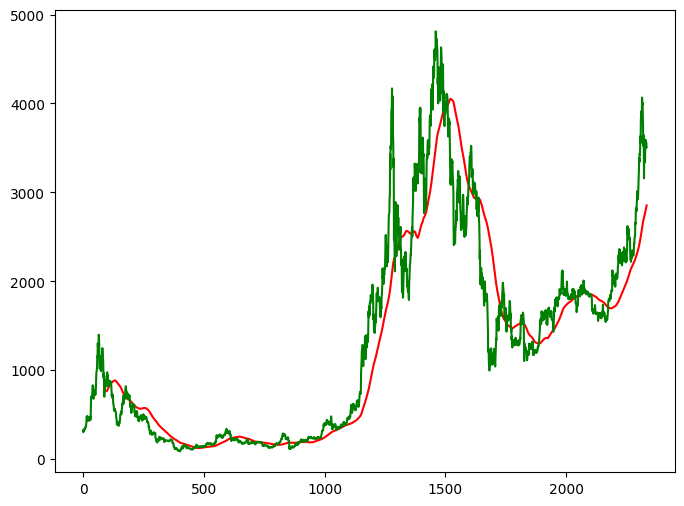

In [67]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [68]:
ma_200_days = data.Close.rolling(200).mean()

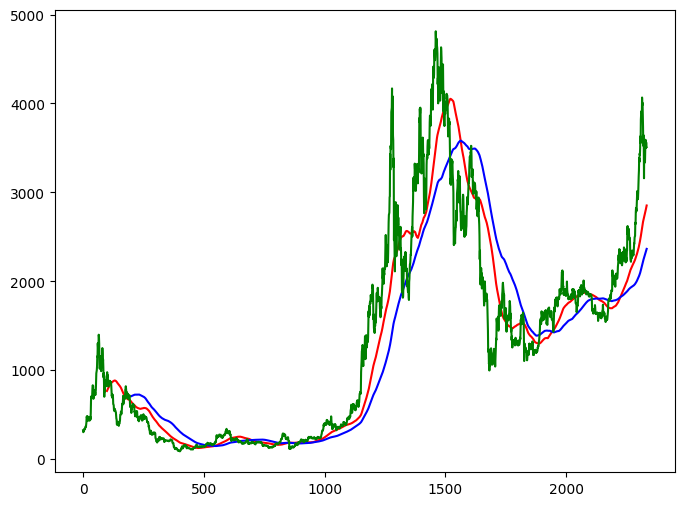

In [69]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [70]:
data.dropna(inplace=True)

In [71]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [72]:
data_train.shape[0]

1867

In [73]:
data_test.shape[0]

467

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [75]:
data_train_scale = scaler.fit_transform(data_train)

In [76]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [77]:
x, y = np.array(x), np.array(y)

In [78]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [79]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [80]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [81]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
56/56 [==============================] - 18s 258ms/step - loss: 0.0202
Epoch 2/50
56/56 [==============================] - 14s 257ms/step - loss: 0.0067
Epoch 3/50
56/56 [==============================] - 14s 247ms/step - loss: 0.0062
Epoch 4/50
56/56 [==============================] - 14s 242ms/step - loss: 0.0059
Epoch 5/50
56/56 [==============================] - 13s 240ms/step - loss: 0.0068
Epoch 6/50
56/56 [==============================] - 13s 240ms/step - loss: 0.0059
Epoch 7/50
56/56 [==============================] - 14s 242ms/step - loss: 0.0051
Epoch 8/50
56/56 [==============================] - 13s 235ms/step - loss: 0.0057
Epoch 9/50
56/56 [==============================] - 13s 238ms/step - loss: 0.0049
Epoch 10/50
56/56 [==============================] - 14s 246ms/step - loss: 0.0047
Epoch 11/50
56/56 [==============================] - 13s 237ms/step - loss: 0.0049
Epoch 12/50
56/56 [==============================] - 14s 242ms/step - loss: 0.0047
Epoch 13/50
5

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [83]:
pas_100_days = data_train.tail(100)

In [84]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [85]:
data_test_scale  =  scaler.fit_transform(data_test)

In [86]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [87]:
y_predict = model.predict(x)

15/15 [==============================] - 2s 95ms/step


In [88]:
scale =1/scaler.scale_

In [89]:
y_predict = y_predict*scale

In [90]:
y = y*scale

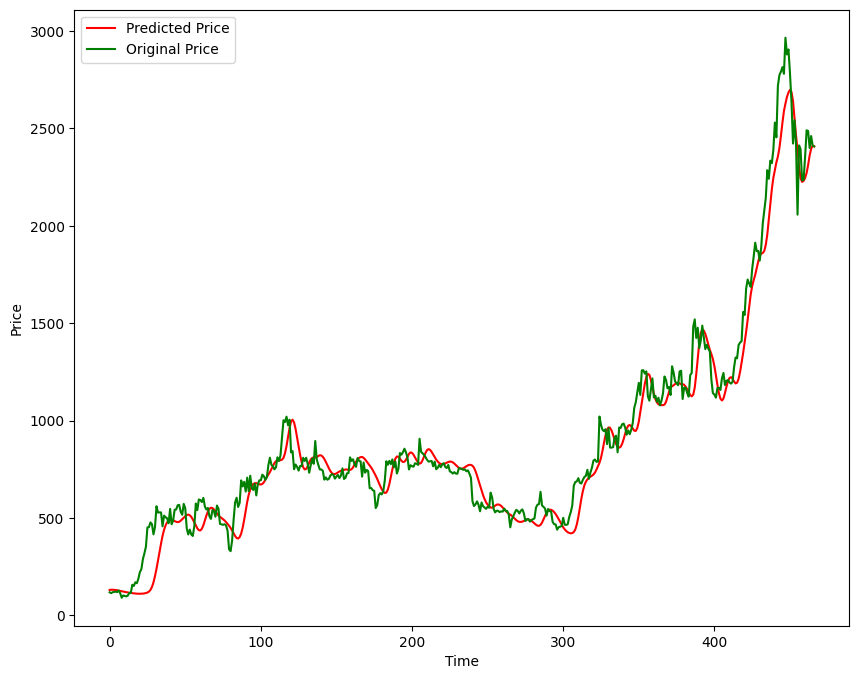

In [91]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [92]:
tfjs.converters.save_keras_model(model,'model')

/home/dexy/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
